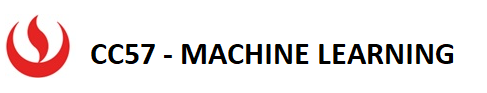

## **ACTIVIDAD #2:** E-COMMERCE AMAZON LIBROS - ANALISIS ESTADISTICO

###**1. DESCRIPCION**

**Amazon.com Inc.** es una tienda de comercio electrónico estadounidense que ofrece una amplia gama de productos, incluyendo libros, música, películas, y computadoras. También ofrece servicios basados en la web, fabrica dispositivos electrónicos tales como Kindle y tabletas, y ofrece servicios de auto-publicación. (Fuente: https://www.bnamericas.com/es/perfil-empresa/amazoncom-inc#:~:text=Amazon.com%20Inc.,ofrece%20servicios%20de%20auto%2Dpublicaci%C3%B3n)

### **2. OBJETIVO**

Realizar un análisis EDA a partir de los datos proporcionados y calcular/visualizar sus principales estadísticas.

####**3. ANALISIS EXPLORATORIO DE LOS DATOS**

El dataset a analizar contiene datos de libros vendidos en Amazon, tanto en formato digital (plaforma Kindle) y fisica.  Cuenta con 133102 observaciones en 16 variables.



####**3.1. Librerias**

In [41]:
#Incluya las principales librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


####**3.2. Carga de datos**

In [42]:
# Cargar datos de libros_amazon.csv
data = pd.read_csv('libros_amazon.csv')

####**3.3. Resumen de los datos**


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               133102 non-null  object 
 1   title              133102 non-null  object 
 2   author             132677 non-null  object 
 3   soldBy             123869 non-null  object 
 4   imgUrl             133102 non-null  object 
 5   productURL         133102 non-null  object 
 6   stars              133102 non-null  float64
 7   reviews            133102 non-null  int64  
 8   price              133102 non-null  float64
 9   isKindleUnlimited  133102 non-null  bool   
 10  category_id        133102 non-null  int64  
 11  isBestSeller       133102 non-null  bool   
 12  isEditorsPick      133102 non-null  bool   
 13  isGoodReadsChoice  133102 non-null  bool   
 14  publishedDate      84086 non-null   object 
 15  category_name      133102 non-null  object 
dtypes:

In [44]:
#Info, head y shape
data.head(5)

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,2020-02-25,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,2015-05-05,Parenting & Relationships


In [45]:
data.shape

(133102, 16)

In [46]:
data.dtypes

asin                  object
title                 object
author                object
soldBy                object
imgUrl                object
productURL            object
stars                float64
reviews                int64
price                float64
isKindleUnlimited       bool
category_id            int64
isBestSeller            bool
isEditorsPick           bool
isGoodReadsChoice       bool
publishedDate         object
category_name         object
dtype: object

In [47]:
# Mostrar detalles estadísticos básicos (solo los calcula a las variables numericas)
data['reviews'].describe()

count    133102.000000
mean        887.375779
std        5104.878777
min           0.000000
25%           0.000000
50%           4.000000
75%         365.000000
max      618227.000000
Name: reviews, dtype: float64

In [48]:
data['price'].describe()

count    133102.000000
mean         15.134127
std          22.254986
min           0.000000
25%           4.990000
50%           9.990000
75%          14.990000
max         682.000000
Name: price, dtype: float64

In [49]:
data['stars'].describe()

count    133102.000000
mean          4.404090
std           0.745646
min           0.000000
25%           4.400000
50%           4.500000
75%           4.700000
max           5.000000
Name: stars, dtype: float64

In [50]:
# Verificar data faltante en cada columna y duplicados
data.isnull().sum()

asin                     0
title                    0
author                 425
soldBy                9233
imgUrl                   0
productURL               0
stars                    0
reviews                  0
price                    0
isKindleUnlimited        0
category_id              0
isBestSeller             0
isEditorsPick            0
isGoodReadsChoice        0
publishedDate        49016
category_name            0
dtype: int64

In [51]:
#Verificar proporciones de valores nulos
data.isnull().mean()

asin                 0.000000
title                0.000000
author               0.003193
soldBy               0.069368
imgUrl               0.000000
productURL           0.000000
stars                0.000000
reviews              0.000000
price                0.000000
isKindleUnlimited    0.000000
category_id          0.000000
isBestSeller         0.000000
isEditorsPick        0.000000
isGoodReadsChoice    0.000000
publishedDate        0.368259
category_name        0.000000
dtype: float64

In [52]:
#Verificar duplicación de registros u observaciones
data.duplicated().sum()


0

###**3.4. Preprocesamiento de los datos**

In [73]:
#Como solucionamos los datos faltantes? Eliminamos todos los datos faltantes?

# Replace missing values in categorical columns with mode
data['author'].fillna(data['author'].mode().iloc[0], inplace=True)
data['soldBy'].fillna(data['soldBy'].mode().iloc[0], inplace=True)
data['publishedDate'].fillna(data['publishedDate'].mode().iloc[0], inplace=True)


In [74]:
#Verificamos que no existan datos faltantes
data.isnull().sum()

asin                 0
title                0
author               0
soldBy               0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
isKindleUnlimited    0
category_id          0
isBestSeller         0
isEditorsPick        0
isGoodReadsChoice    0
publishedDate        0
category_name        0
dtype: int64

In [55]:
#Solucionar duplicidad en los datos (si existen)

In [56]:
#Identificar variables con valores atipicos
# Identify variables with outliers
outliers = data[['stars', 'reviews', 'price']]

# Calculate the z-score for each variable
z_scores = (outliers - outliers.mean()) / outliers.std()

# Find the indices of rows with z-scores greater than 3 or less than -3
outlier_indices = z_scores[(z_scores > 3) | (z_scores < -3)].dropna().index

# Print the rows with outliers
print(data.loc[outlier_indices])

Empty DataFrame
Columns: [asin, title, author, soldBy, imgUrl, productURL, stars, reviews, price, isKindleUnlimited, category_id, isBestSeller, isEditorsPick, isGoodReadsChoice, publishedDate, category_name]
Index: []


In [57]:
# De existir, eliminar Outliers describiendo que tecnica(s) ha utilizado en cada caso



In [58]:
# Genere un dataset con los datos preparados

A partir de los datos preparados, trabaje las siguientes secciones.

####**4. ESTADISTICA DESCRIPTIVA**

In [59]:
# A partir del dataset preparado, mostrar detalles estadísticos básicos

In [60]:
#Identificar y separar variables numéricas y categóricas


####**4.1 Análisis Univariado de los Datos**

#### **Diagramas de pares y diagramas de distribución**

In [61]:
# Generar estadísticas descriptivas para columnas numéricas


In [62]:
# Generar estadísticas descriptivas para columnas categóricas
# Si No hay variables categoricas, considere crear algunas


In [63]:
# Utilice algunas de las medidas de dispersion y representelas a traves de diagramas
# Creando un diagrama de pares y de distribucion para variables numéricas


####**4.2 Análisis Bivariado de los Datos**

#### **- Correlacion de variables**

In [64]:
# Calcular e imprimir la matriz de correlación para variables numéricas.


In [65]:
# Visualizar la matriz de correlacion en un mapa de calor


In [66]:
# Calculo del coeficiente de asimetria y de curtosis. Como los interpreta?

¿Qué variables son las tienen mayor correlación?

**Respuesta:**

### **4. Visualización de los datos**

In [67]:
#Grafica de barras de la distribucion de los libros por categoria en orden descendente, distinga los que son betsellers de los que nolo son


In [68]:
# Cantidad de libros por cada categoria


In [69]:
#Top Autores de Best Sellers


In [70]:
#Ratings for Best Sellers


### **5. Observaciones**

**Respuesta:** (liste las principales observaciones o conclusiones observadas luego del análisis)